In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 2024-12-04 18:29:52 Wednesday

@author: Nikhil Kapila
"""

import os, sys
path = False

In [2]:
if path is False:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(),'..', '..', '..')))
    os.chdir(os.path.abspath(os.path.join(os.getcwd(),'..', '..')))
    path = True
else: print('Already changed to correct directory.')

from utils.model_loader import MLFlowModelLoader

## Models Loading

In [3]:
from models.mnistresnet import MNISTResNet
from models.resnet_self_att_mnist import ResnetSelfAttMNIST
from models.resnet_multi_head_att_mnist import ResnetMultiHeadAttMNIST
from models.resnet_cbam_mnist import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock

In [4]:
base_model = MNISTResNet(
    OriginalBasicBlock,
    [3, 3, 3],
    10
)

loader = MLFlowModelLoader(run_id='08ef1e5e2ca0421ebad1f90a4e9fad48', 
                           experiment_id='993463987470781520',
                           tracking_uri='', ui_open=False)

resnet20 = loader.load_weights(base_model)

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/993463987470781520/08ef1e5e2ca0421ebad1f90a4e9fad48/artifacts/model/data'
Object params.pth loaded.


/Users/nkapila6/Code/CNNtention/utils/model_loader.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  object.load_state_dict(torch.load(path, map_location=torch.device(dev

In [5]:
self_att_model = ResnetSelfAttMNIST(OriginalBasicBlock,
                               [3, 3, 3],
                               10
                               )

loader2 = MLFlowModelLoader(run_id='7b75f0679c23498f98a09a8c460376d3',
                           experiment_id='451732630027606899',
                           tracking_uri='',
                           ui_open=False)

resnet20selfatt = loader2.load_weights(self_att_model)

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/451732630027606899/7b75f0679c23498f98a09a8c460376d3/artifacts/model/data'
Object params.pth loaded.


In [6]:
multi_head_att = ResnetMultiHeadAttMNIST(OriginalBasicBlock,
                               [3, 3, 3],
                               10
                               )

loader3 = MLFlowModelLoader(run_id='b88ac087f70044f68929fbdc25f94599',
                           experiment_id='142325963722404463',
                           tracking_uri='',
                           ui_open=False)

resnet20mhatt = loader3.load_weights(multi_head_att)

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/142325963722404463/b88ac087f70044f68929fbdc25f94599/artifacts/model/data'
Object params.pth loaded.


In [7]:
cbam_att_final = ResnetCBAM(OriginalBasicBlock,
                               [3, 3, 3],
                               10, 16
                               )

loader4 = MLFlowModelLoader(run_id='1717fd3a37e0440686d1abd8d91b91b8',
                           experiment_id='605196631731438821',
                           tracking_uri='',
                           ui_open=False)

resnet20cbamatt_final = loader4.load_weights(cbam_att_final)

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/605196631731438821/1717fd3a37e0440686d1abd8d91b91b8/artifacts/model/data'
Object params.pth loaded.


In [8]:
resnet20.layer3

Sequential(
  (0): OriginalBasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
  )
  (1): OriginalBasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
  )
  (2): OriginalBasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

In [9]:
from utils.viz import Viz

viz = Viz([resnet20, resnet20selfatt, resnet20mhatt, resnet20cbamatt_final],
              [resnet20.layer3[-1], resnet20selfatt.att3, resnet20mhatt.att3, resnet20cbamatt_final.att3], dataset='MNIST')

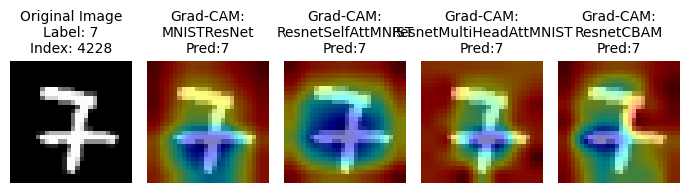

In [12]:
fig = viz.get_gradcam(4228)